In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sea
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('D:\\Users\\Home\\Data_Analyst\\Admission_Predict.csv')

In [3]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [4]:
# since serial no is not a feature we will delete this column
df.drop('Serial No.',axis=1,inplace=True)

In [5]:
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [6]:
df.dtypes   # no need of label encoder thed data is numeric type

GRE Score              int64
TOEFL Score            int64
University Rating      int64
SOP                  float64
LOR                  float64
CGPA                 float64
Research               int64
Chance of Admit      float64
dtype: object

In [7]:
df.isnull().sum()

GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

<Axes: >

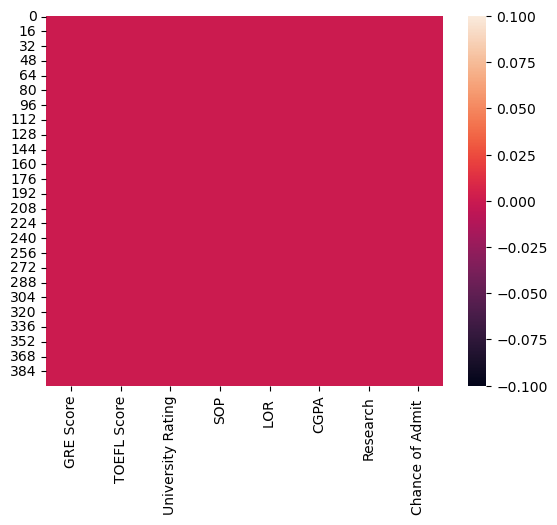

In [8]:
sea.heatmap(df.isnull())

In [9]:
df.skew()

GRE Score           -0.062893
TOEFL Score          0.057216
University Rating    0.171260
SOP                 -0.275761
LOR                 -0.106991
CGPA                -0.065991
Research            -0.191582
Chance of Admit     -0.353448
dtype: float64

<Axes: >

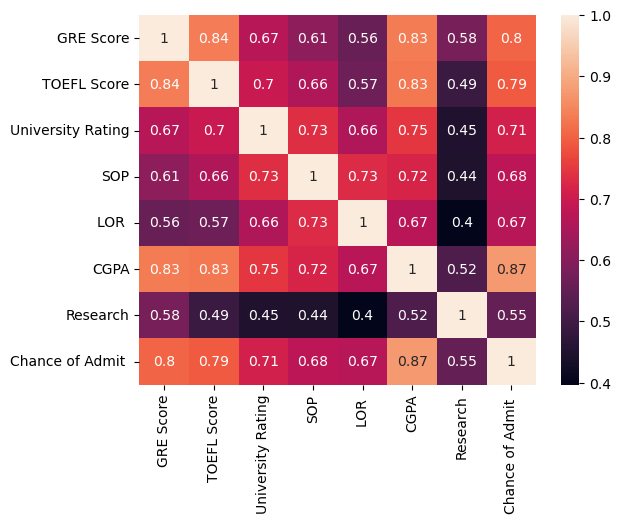

In [10]:
sea.heatmap(df.corr(),annot=True)

In [11]:
# As correlation of every input is more than 0.5, we will not correct the skewness

In [12]:
# Since output that we have to predict is continous numeric type this is a regression problem
# As the dataset consist of no of inputs this is a case Multiple Regression


In [13]:
df.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research', 'Chance of Admit '],
      dtype='object')

In [14]:
# dividing dataset into input and output
X=df.drop('Chance of Admit ',axis=1)
Y=df['Chance of Admit ']

In [15]:
from sklearn.model_selection import train_test_split


In [16]:
# dividing dataset int0o 70% training data and 30% test data
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=1)

In [17]:
# applying scaling technique using MinMaxScaler as output as a certain range (max to min)
# if output is categoraical type use StandardScaler
from sklearn.preprocessing import MinMaxScaler
mms=MinMaxScaler()
X_train=mms.fit_transform(X_train)
X_test=mms.transform(X_test)

In [18]:
# applying Linear Regression model
from sklearn.linear_model import LinearRegression
lr=LinearRegression()

In [19]:
# train thr model with 70% data
lr.fit(X_train,Y_train)

LinearRegression()

In [20]:
# predict using 30% data
Y_pred=lr.predict(X_test)

In [21]:
lr.coef_

array([ 0.06669723,  0.07501319,  0.03564014, -0.00052447,  0.07357351,
        0.29345739,  0.03021795])

In [22]:
lr.intercept_

0.42471996145823704

In [23]:
# training score
lr.score(X_train,Y_train)

0.7957139978586953

In [24]:
# checking error
from sklearn.metrics import mean_squared_error
mse=mean_squared_error(Y_test,Y_pred)
print(mse)


0.004327509725329155


In [25]:
# testing score
from sklearn.metrics import r2_score
score=r2_score(Y_test,Y_pred)
print(score)

0.8103743116598119


In [26]:
# since testing and training score are close we are not going toapply regularization

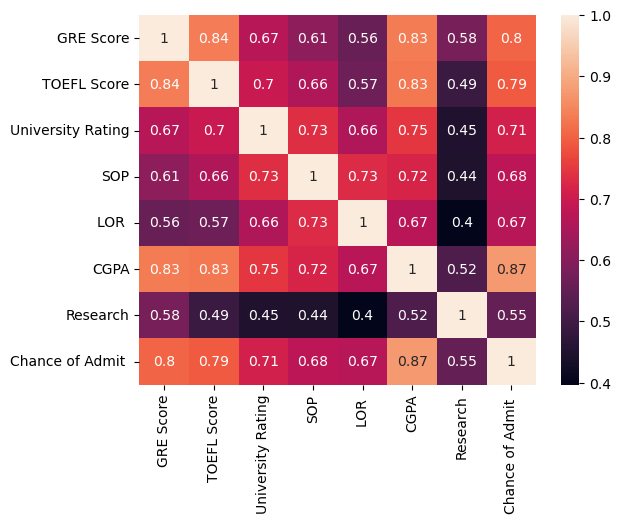

In [27]:
# checking if the LinearRegression model is valid
# 1.Collinearity
sea.heatmap(df.corr(),annot=True)
plt.show()

In [28]:
# There is a colinnearity seen within inputs
# so we will keep most correlated input with output
X=df[["CGPA"]]

In [29]:
# dividing dataset into 70% training and 30% testing
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=1)

In [30]:
X_train=mms.fit_transform(X_train)
X_test=mms.transform(X_test)

In [31]:
# train the model with 70% data
lr.fit(X_train,Y_train)

LinearRegression()

In [32]:
# predict the data
Y_pred=lr.predict(X_test)

In [33]:
lr.coef_

array([0.54986604])

In [34]:
lr.intercept_

0.44305801463826167

In [35]:
# training Score
lr.score(X_train,Y_train)

0.7493981351140424

In [36]:
mse=mean_squared_error(Y_test,Y_pred)
mse

0.004904350585434019

In [37]:
# testing score
score=r2_score(Y_test,Y_pred)
score

0.7850979166652724

In [38]:
# again the training and testing score are equal so need of regualrization

In [39]:
# 2. check Linear relationship between input and output i.e by calculating residual(error) and then plotting with predicted value
residuals=Y_test-Y_pred

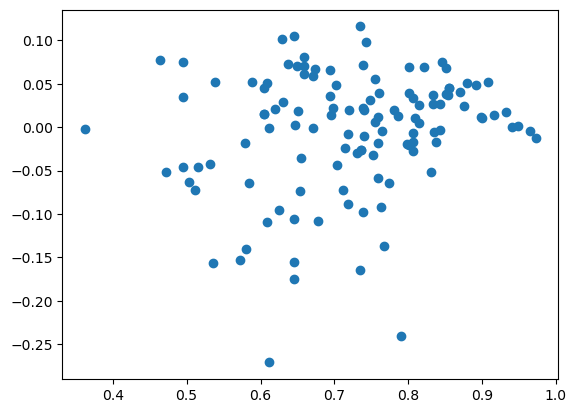

In [40]:
plt.scatter(Y_pred,residuals)

In [41]:
# linear trend can be observed

In [42]:
# Homoskedatic that is data points are not close enough

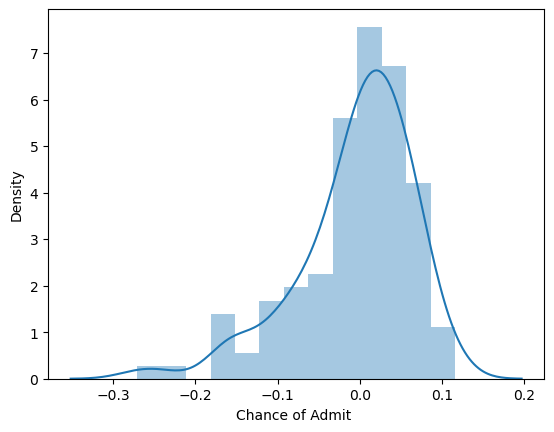

In [43]:
# check if the residuals is normally distributed
sea.distplot(residuals)
plt.show()

In [44]:
residuals.skew()  # negative skewness

-1.2176684740903692

In [45]:
# As per Linearregression assumptiomn here only two assumptions are satisfied.

In [46]:
from sklearn.preprocessing import PolynomialFeatures

In [47]:
pf=PolynomialFeatures(2)

In [48]:
X_poly=pf.fit_transform(X)

In [49]:
X_train,X_test,Y_train,Y_test=train_test_split(X_poly,Y,test_size=0.3,random_state=1)

In [50]:
X_train=mms.fit_transform(X_train)
X_test=mms.transform(X_test)

In [51]:
lr.fit(X_train,Y_train)

LinearRegression()

In [52]:
Y_pred=lr.predict(X_test)

In [53]:
lr.coef_

array([0.        , 0.07398922, 0.47273867])

In [54]:
lr.intercept_

0.4598679219445668

In [55]:
lr.score(X_train,Y_train)

0.7503415344872955

In [56]:
mse=mean_squared_error(Y_test,Y_pred)
mse

0.004931310784287202

In [57]:
score=r2_score(Y_test,Y_pred)
score

0.783916556809418

In [58]:
residuals=Y_test-Y_pred

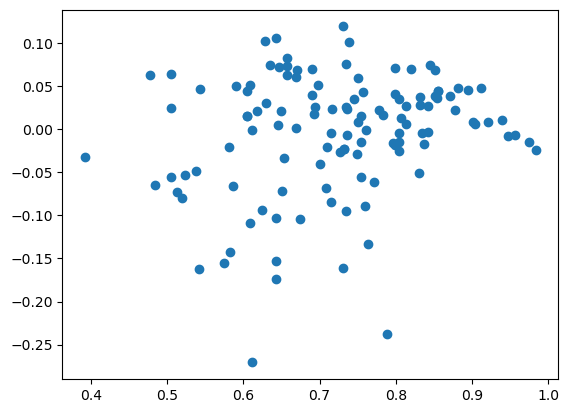

In [59]:
plt.scatter(Y_pred,residuals)

In [60]:
# 3.Homoskedatic condition not satisfied as the data points are not near to each other

<Axes: xlabel='Chance of Admit ', ylabel='Density'>

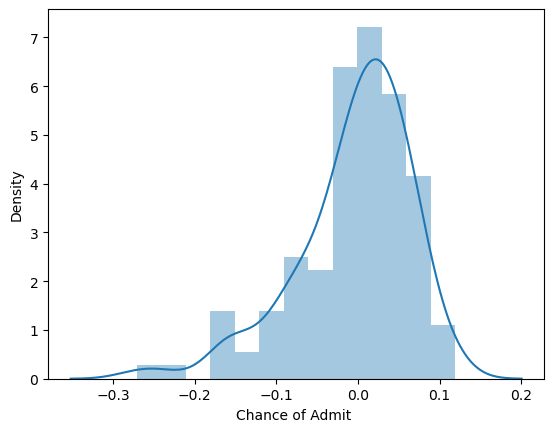

In [61]:
# 4.normal distrubited residuals
sea.distplot(residuals)


In [62]:
residuals.skew() # negative skewness

-1.1794366774015714

In [63]:
pf=PolynomialFeatures(3)

In [64]:
X_poly=pf.fit_transform(X)

In [65]:
X_train,X_test,Y_train,Y_test=train_test_split(X_poly,Y,test_size=0.3,random_state=1)

In [66]:
X_train=mms.fit_transform(X_train)
X_test=mms.transform(X_test)

In [67]:
# training the model with 70% data
lr.fit(X_train,Y_train)

LinearRegression()

In [68]:
# predict using 30% data
Y_pred=lr.predict(X_test)

In [69]:
lr.coef_

array([ 0.        , -3.83593033,  8.29629839, -3.93135888])

In [70]:
lr.intercept_

0.46968438200121987

In [71]:
lr.score(X_train,Y_train)

0.7505533950850434

In [72]:
mse=mean_squared_error(Y_test,Y_pred)
mse

0.004932730581244121

In [73]:
score=r2_score(Y_test,Y_pred)
score

0.7838543432056719

In [74]:
residuals=Y_test-Y_pred

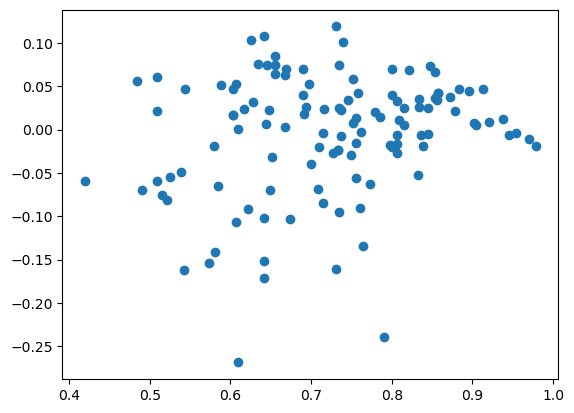

In [75]:
plt.scatter(Y_pred,residuals)

In [76]:
residuals.skew()

-1.153582150489941

In [77]:
# the condition of homoskedatic and normal distribution is not satisfied thereforre we can increase the deg of polynomial

In [78]:
pf=PolynomialFeatures(4)

In [79]:
X_poly=pf.fit_transform(X)

In [80]:
X_train,X_test,Y_train,Y_test=train_test_split(X_poly,Y,test_size=0.3,random_state=1)

In [81]:
X_train=mms.fit_transform(X_train)
X_test=mms.transform(X_test)

In [82]:
lr.fit(X_train,Y_train)

LinearRegression()

In [83]:
Y_pred=lr.predict(X_test)

In [84]:
lr.coef_

array([   0.        ,  184.69123446, -559.59790109,  569.24221075,
       -193.80076987])

In [85]:
lr.intercept_

0.4382887765440625

In [86]:
lr.score(X_train,Y_train)

0.7524199654288949

In [87]:
mse=mean_squared_error(Y_test,Y_pred)
mse

0.0050266634529706235

In [88]:
score=r2_score(Y_test,Y_pred)
score

0.7797383303970458

In [89]:
residuals=Y_test-Y_pred

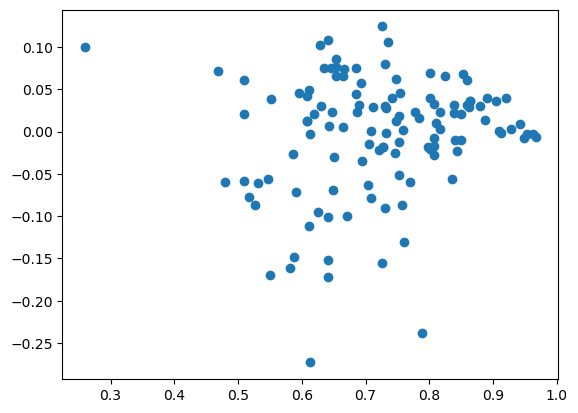

In [90]:
plt.scatter(Y_pred,residuals)

<Axes: xlabel='Chance of Admit ', ylabel='Density'>

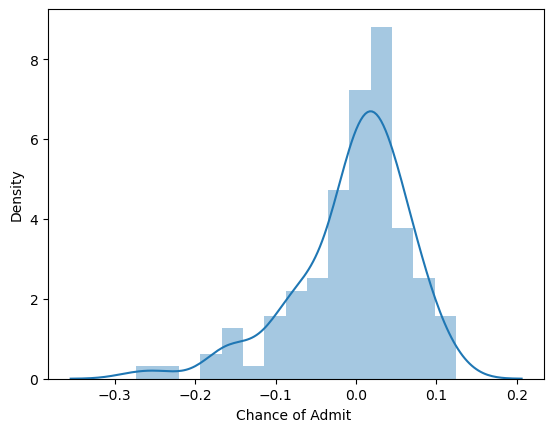

In [91]:
sea.distplot(residuals)


In [92]:
residuals.skew()

-1.1622370148646082

In [93]:
# 3 conditions that is no multicolinearity, linear relation between input and output, homoskedatic is satisfied
# but 4 th assumption is not satisfied skewness is still negative, no normal distribution

In [94]:
dic={"Y_original":Y_test,"Y_predicted":Y_pred}
df1=pd.DataFrame(dic)
df1.head(10)

,Y_original,Y_predicted
398,0.67,0.756404
125,0.64,0.730056
328,0.80,0.754163
339,0.81,0.730056
172,0.86,0.838064
342,0.58,0.648530
197,0.73,0.664627
291,0.56,0.586563
29,0.54,0.468524
284,0.94,0.947622


In [95]:
# as per r2_score calculated above we can assure 78% of accuracy.